In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
sns.set_palette("colorblind")

In [166]:
LATEST_CASES_PATH_CSV = 'data/cases-per-day.csv'
LATEST_CASES_PATH_XLSX = 'data/cases-per-day.xlsx'

In [192]:
df = pd.read_excel(LATEST_CASES_PATH_XLSX, parse_dates=[0], encoding='iso-8859-1', index_col=0)
df = df.drop(columns=['day', 'month', 'year', 'countryterritoryCode'])

df

,cases,deaths,countriesAndTerritories,geoId,popData2018
dateRep,,,,,
2020-03-29,15,1,Afghanistan,AF,37172386.0
2020-03-28,16,1,Afghanistan,AF,37172386.0
2020-03-27,0,0,Afghanistan,AF,37172386.0
2020-03-26,33,0,Afghanistan,AF,37172386.0
2020-03-25,2,0,Afghanistan,AF,37172386.0
...,...,...,...,...,...
2020-03-25,0,0,Zimbabwe,ZW,14439018.0
2020-03-24,0,1,Zimbabwe,ZW,14439018.0
2020-03-23,0,0,Zimbabwe,ZW,14439018.0


In [223]:
def rank_index(df):
    new_df = df.reset_index()
    new_df.index += 1
    
    return new_df.drop(columns=['index'])

In [187]:
aggregated = df.groupby(['geoId', 'popData2018', 'countriesAndTerritories'], as_index=False)['cases'].sum()

aggregated['casesPer100k'] = aggregated['cases'] / (aggregated['popData2018'] / 10 ** 5)
aggregated = aggregated.sort_values(by=['casesPer100k'], ascending=False)
aggregated = rank_index(aggregated)

aggregated

,geoId,popData2018,countriesAndTerritories,cases,casesPer100k
1,JPG11668,3000.0,Cases_on_an_international_conveyance_Japan,696,23200.000000
2,SM,33785.0,San_Marino,224,663.016131
3,VA,1000.0,Holy_See,6,600.000000
4,AD,77006.0,Andorra,308,399.968834
5,FO,48497.0,Faroe_Islands,155,319.607398
...,...,...,...,...,...
189,MM,53708395.0,Myanmar,8,0.014895
190,ET,109224559.0,Ethiopia,16,0.014649
191,AO,30809762.0,Angola,4,0.012983
192,SD,41801533.0,Sudan,5,0.011961


In [189]:
# Only consider countries with at least 1m citizens
larger_countries = aggregated[aggregated['popData2018'] >= 10 ** 6]
larger_countries = larger_countries.sort_values(by=['casesPer100k'], ascending=False)
larger_countries = rank_index(larger_countries)

larger_countries[['countriesAndTerritories', 'casesPer100k', 'cases', 'popData2018']].head(60)

,countriesAndTerritories,casesPer100k,cases,popData2018
1,Spain,154.628003,72248,4.672375e+07
2,Switzerland,154.428857,13152,8.516543e+06
3,Italy,153.020084,92472,6.043128e+07
4,Austria,93.714992,8291,8.847037e+06
5,Belgium,79.968006,9134,1.142207e+07
6,Norway,72.351466,3845,5.314336e+06
7,Germany,63.364665,52547,8.292792e+07
8,Netherlands,56.653650,9762,1.723102e+07
9,France,56.092769,37575,6.698724e+07
10,Portugal,50.283210,5170,1.028176e+07


In [221]:
def cases_per_100k_over_time(country_code, df, since=np.datetime64('2020-02-20')):
    cdf = df.loc[df.index >= since]
    cdf = cdf[(cdf['geoId'] == country_code)]
    cdf = cdf.sort_index(ascending=True)
    cdf['cum_cases'] = cdf['cases'].cumsum()
    cdf['casesPer100k'] = cdf['cum_cases'] / (cdf['popData2018'] / 10 ** 5)
    
    cdf = cdf[cdf['cum_cases'] > 500]
    cdf = rank_index(cdf)
    
    return cdf

In [224]:
countries = ['SE', 'UK', 'IT', 'KR', 'US']
frames = [cases_per_100k_over_time(country, df) for country in countries]
plot_df = pd.concat(frames)

RangeIndex(start=0, stop=17, step=1)


KeyError: "['index'] not found in axis"

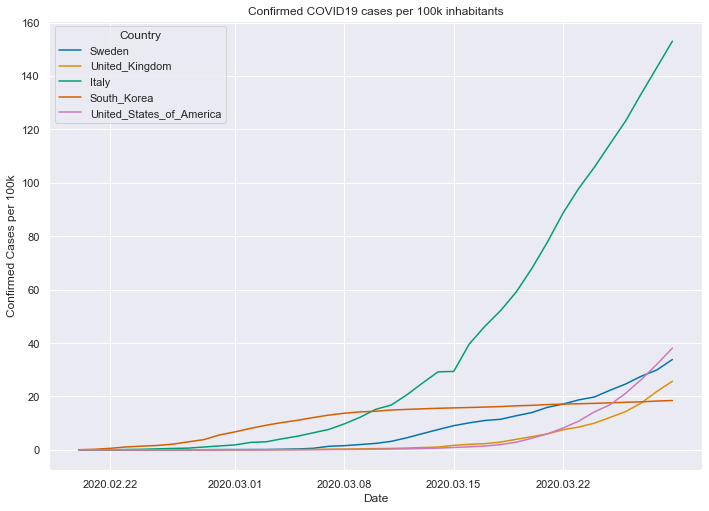

In [218]:
ax = sns.lineplot(
    x=plot_df.index, 
    y='casesPer100k',
    hue='countriesAndTerritories',
    legend='full',
    data=plot_df
)
ax.set(title='Confirmed COVID19 cases per 100k inhabitants')
ax.set(xlabel='Date')
ax.set(ylabel='Confirmed Cases per 100k')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
labels = ax.get_legend().get_texts()
ax.legend(title='Country', loc='upper left', labels=[label.get_text() for label in labels[1:]])
plt.show()

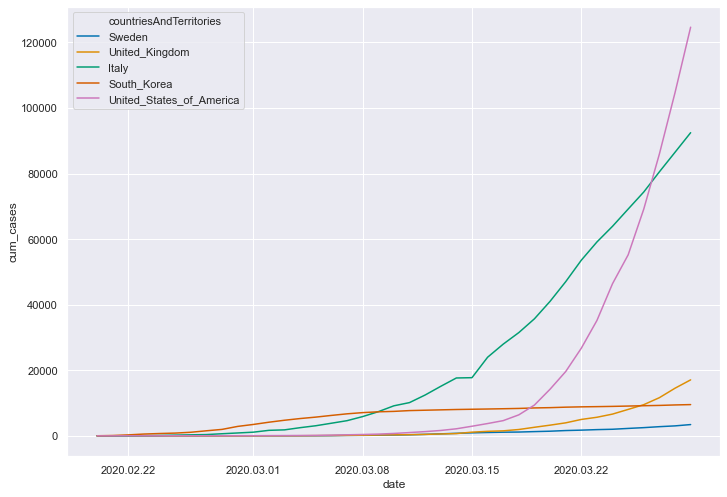

In [220]:
ax = sns.lineplot(
    x=plot_df.index, 
    y='cum_cases',
    hue='countriesAndTerritories',
    data=plot_df
)
ax.set(xlabel='date')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
plt.show()